---
#  --------- **Lab Report 06** -----------
> ## **Name   : Muhammad Ehtisham Saleem**
> ## **Reg No : B22F1242AI108**
> ## **Lab : Digital Image Processing**
 >## **Submitted To : Sir Rizwan Shah**
>## **Course Instructor : Dr. Abdul Jalil**
---

---



# **Introduction**
> In this lab task, I cover image processing techniques to enhance images for various real-world applications. The focus is on noise removal, edge enhancement, and feature highlighting to improve image quality for better analysis and decision-making.

## **The lab is divided into four scenarios:**


* Enhancing X-ray Images for Medical Diagnosis – I remove noise and enhance edges to help radiologists detect fractures more effectively.
* Object Detection in Autonomous Vehicles – I smooth images, detect lane markings, and preserve object edges for better navigation.
* Restoring Old and Blurry Photographs – I reduce noise, sharpen details, and maintain natural textures to restore historical images.
* Enhancing Fingerprint Images for Biometric Systems – I improve fingerprint clarity by removing smudges and enhancing ridge patterns for accurate recognition.

## **Importing Required Libraries**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## **Explanation:**
* cv2 (OpenCV): Used for reading, processing, and saving images.
* numpy: Helps in mathematical operations and handling image arrays.
* matplotlib.pyplot: Used for displaying images effectively.

# **Scenario no 01 : Enhancing X-ray Images for Medical Diagnosis**

## **Step 1: Load and Display the Original X-ray Image**

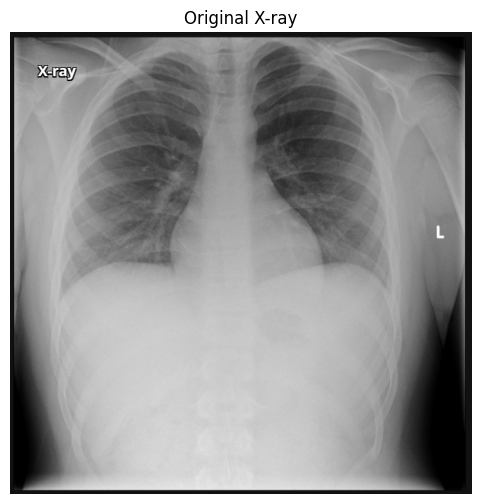

In [4]:
image = cv2.imread('Scanerio 01.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original X-ray')
plt.axis('off')
plt.show()


## **Explanation:**
* The X-ray image is loaded in grayscale to maintain medical image clarity.
* plt.imshow(image, cmap='gray'): Displays the original image without colors.

## **Step 2: Noise Removal (Preserving Important Details)**
### **Apply Gaussian Blur**

In [6]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)

## **Explanation:**
* cv2.GaussianBlur(image, (5,5), 0): Applies a 5x5 Gaussian filter.
* Helps smooth out small noise while preserving edges.



### **Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)**

In [7]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
noise_removed = clahe.apply(blurred)  # Improves contrast and detail visibility


## **Explanation:**
* CLAHE enhances local contrast and prevents over-brightening.
* clipLimit=2.0: Controls contrast amplification.
* tileGridSize=(8,8): Divides the image into small tiles to enhance local details.

## **Display Noise-Removed Image**

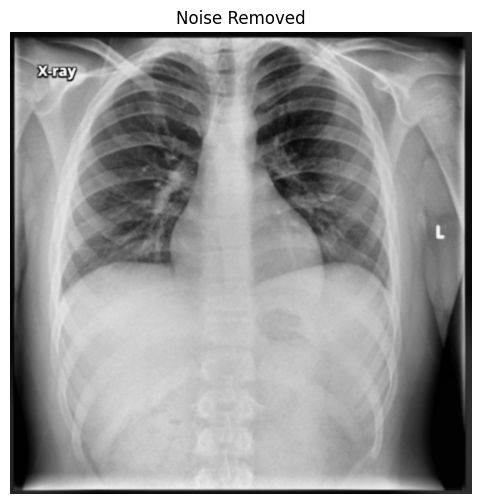

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(noise_removed, cmap='gray')
plt.title('Noise Removed')
plt.axis('off')
plt.show()


## **Explanation:**
* Displays the noise-removed image to show the effect of Gaussian Blur and CLAHE.

## **Step 3: Edge Enhancement (Highlighting Fractures)**
### **Reapply CLAHE for Consistency**

In [9]:
enhanced = clahe.apply(blurred)  # Using CLAHE-enhanced image for edge detection


## **Explanation:**
* This ensures edge detection is applied to the enhanced image rather than the original.

## **Apply Laplacian Filter for Edge Detection**

In [13]:
laplacian = cv2.Laplacian(enhanced, cv2.CV_64F, ksize=3)
laplacian = np.uint8(np.absolute(laplacian))  # Convert to 8-bit format



## **Explanation:**
* cv2.Laplacian(enhanced, cv2.CV_64F, ksize=3): Detects edges using a Laplacian filter.
* Converts output to 8-bit format for proper visualization.


## **Step 4: Combine Enhanced Image with Edge Information**

In [15]:
# Combine the enhanced image with edges (without thresholding)
alpha = 0.7  # Weight for enhanced image
beta = 0.3   # Weight for edge image
edges_enhanced = cv2.addWeighted(enhanced, alpha, laplacian, beta, 0.0)

## **Explanation:**
* Blends the enhanced image with detected edges for better fracture visibility.
* alpha=0.7: Gives more weight to the enhanced image.
* beta=0.3: Adds edge intensity without overwhelming the original details.

### **Display Enhanced Edges Image**

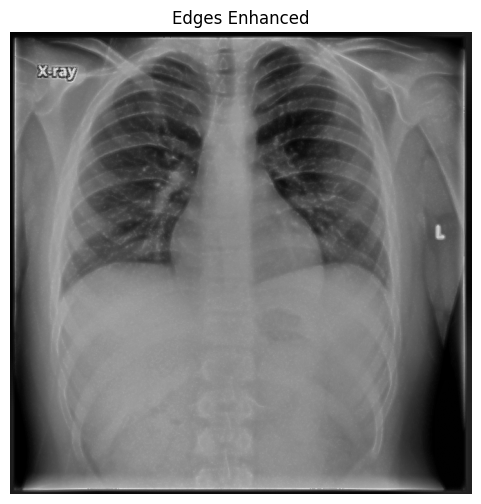

In [16]:
plt.figure(figsize=(6, 6))
plt.imshow(edges_enhanced, cmap='gray')
plt.title('Edges Enhanced')
plt.axis('off')
plt.show()


## **Explanation:**
* Displays the final processed image with highlighted fractures.

## **Step 5: Compare All Images**

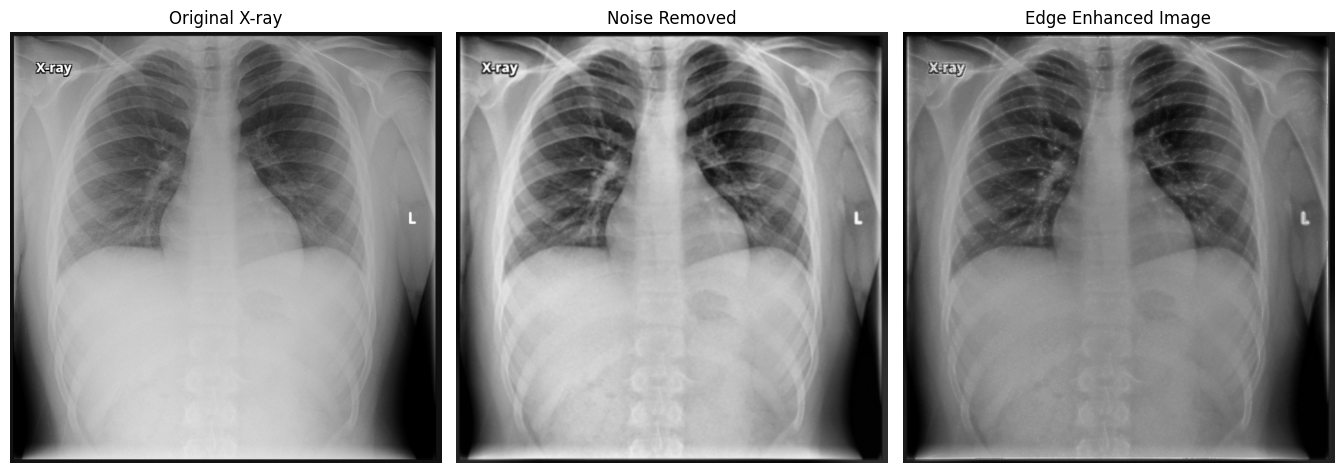

In [18]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original X-ray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noise_removed, cmap='gray')
plt.title('Noise Removed')
plt.axis('off')


plt.subplot(1, 4, 3)
plt.imshow(edges_enhanced, cmap='gray')
plt.title('Edge Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## **Explanation:**
This compares all stages side by side:
 * Original X-ray
 * Noise Removed
 * Final Edge Enhanced Image


---



# **Scenario no 02 : Object Detection in Autonomous Vehicles**

## **Step 1: Load and Display the Original Road Image**

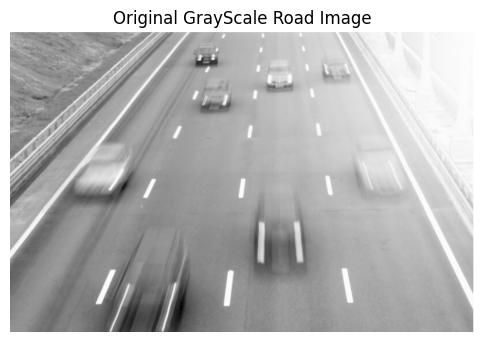

In [24]:
image = cv2.imread('Scanerio 02.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original GrayScale Road Image')
plt.axis('off')
plt.show()


## **Explanation:**
* Loads the road image in grayscale to remove unnecessary color information.

## **Step 2: Smooth the Image and Remove Unnecessary Details**
### **Apply Gaussian Blur to Reduce Noise**

In [25]:
smoothed = cv2.GaussianBlur(image, (5, 5), 0)  # 5x5 kernel for smoothing


# **Explanation:**
* Removes minor details that may interfere with edge detection.
* Ensures smoother lane detection.


## **Enhance Contrast Using CLAHE**


In [26]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
smoothed_enhanced = clahe.apply(smoothed)  # Enhances road details


### **Explanation:**
* CLAHE enhances lane markings and objects by improving local contrast.
* Prevents overexposure in bright areas.

### **Display Smoothed and Enhanced Image**

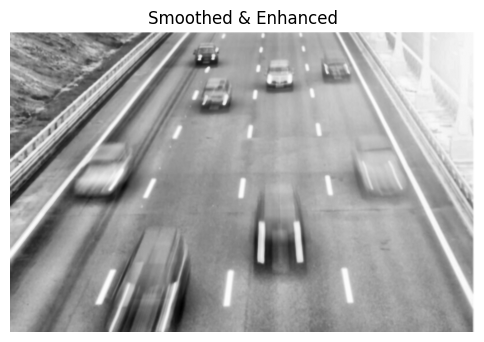

In [27]:
plt.figure(figsize=(6, 6))
plt.imshow(smoothed_enhanced, cmap='gray')
plt.title('Smoothed & Enhanced')
plt.axis('off')
plt.show()


### **Explanation:**
* Displays the contrast-enhanced image to show road markings more clearly.

## **Step 3: Detect Edges for Lane Markings and Road Boundaries**
* Apply Canny Edge Detection

In [28]:
edges = cv2.Canny(smoothed_enhanced, 50, 150)  # Lower threshold for softer edges


### **Explanation:**
* Detects lane markings and road edges by finding sharp intensity changes.

### **Soften Edges Using Gaussian Blur**

In [29]:
edges_softened = cv2.GaussianBlur(edges, (5, 5), 0)


### **Explanation:**
* Reduces harsh edges to avoid false lane detection.

### **Remove Small Noises Using Morphological Closing**

In [30]:
kernel = np.ones((3, 3), np.uint8)
edges_cleaned = cv2.morphologyEx(edges_softened, cv2.MORPH_CLOSE, kernel)


### **Explanation:**
* Closes gaps in lane markings and removes small noise.

### **Invert Edge Colors for Better Visibility**

In [31]:
edges_light_mode = cv2.bitwise_not(edges_cleaned)


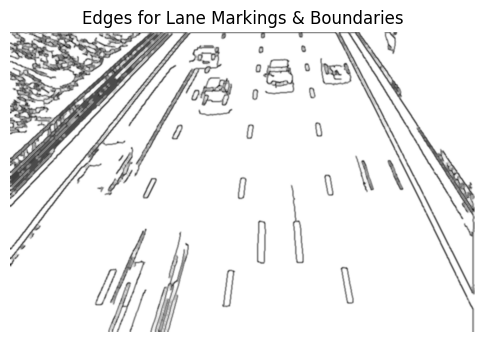

In [33]:
plt.figure(figsize=(6, 6))
plt.imshow(edges_light_mode, cmap='gray')
plt.title('Edges for Lane Markings & Boundaries')
plt.axis('off')
plt.show()


## **Explanation:**
* Displays the lane markings and road edges detected.

## **Step 4: Reduce Noise While Preserving Edges for Object Detection**

In [34]:
alpha = 0.8  # Weight for smoothed image
beta = 0.2   # Weight for edge-detected image
result = cv2.addWeighted(smoothed_enhanced, alpha, edges_light_mode, beta, 0.0)


## **Explanation:**
* Merges the enhanced image with detected edges.
* Highlights lane markings and objects while reducing noise.

### **Display Final Processed Image**

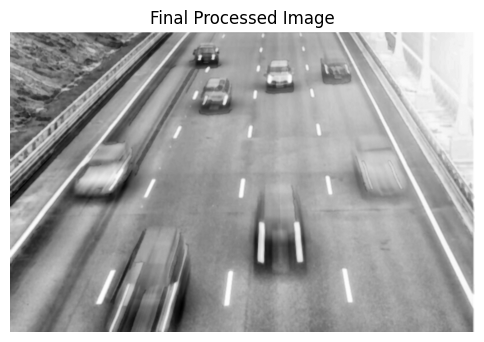

In [35]:
plt.figure(figsize=(6, 6))
plt.imshow(result, cmap='gray')
plt.title('Final Processed Image')
plt.axis('off')
plt.show()


## **Explanation:**
* Shows the final output with enhanced lane detection and object visibility.

## **Step 5: Compare All Images**

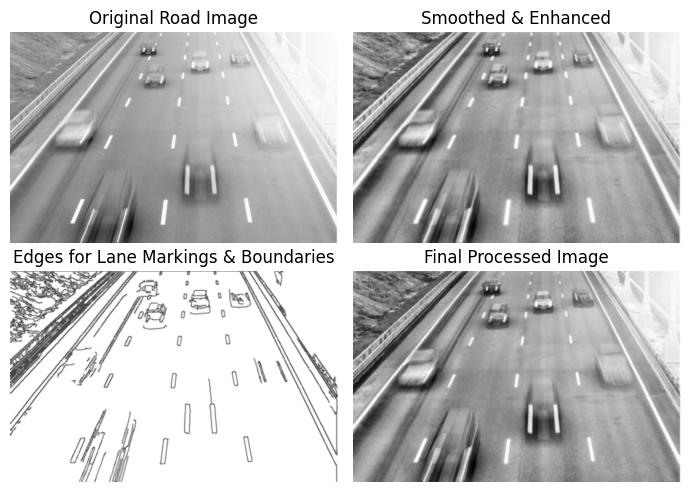

In [39]:
plt.figure(figsize=(7, 5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Road Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed_enhanced, cmap='gray')
plt.title('Smoothed & Enhanced')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_light_mode, cmap='gray')
plt.title('Edges for Lane Markings & Boundaries')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title('Final Processed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Explanation:**
* Compares the original, enhanced, edges, and final processed images.



---



# **Scenario 03: Restoring Old and Blurry Photographs**

## **Step 1: Load the Image**
We first load the old photograph in grayscale mode to simplify processing and improve computational efficiency.

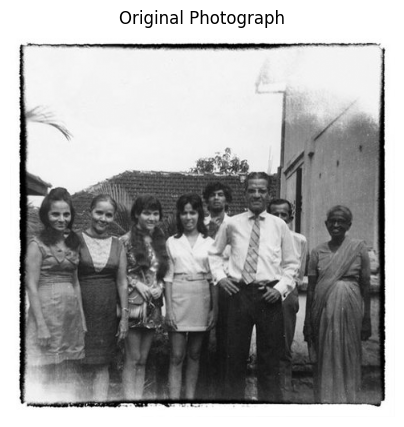

In [41]:
image = cv2.imread('Scanerio 03.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Original Photograph')
plt.axis('off')
plt.show()


## **Explanation:**
* The image is loaded in grayscale mode to reduce computational complexity while preserving details.

## **Step 2: Reduce General Noise and Smooth the Image**
To remove large unwanted noise and enhance overall clarity, we apply Gaussian Blur.

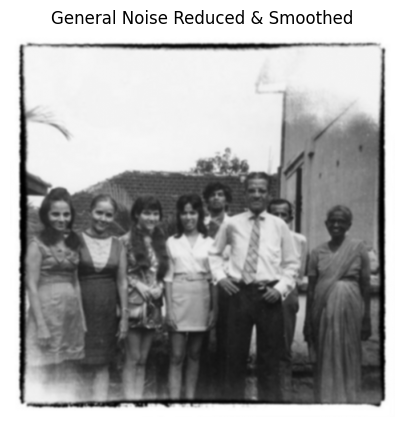

In [42]:
smoothed = cv2.GaussianBlur(image, (5, 5), 0)  # 5x5 kernel, sigma=0

plt.figure(figsize=(5, 5))
plt.imshow(smoothed, cmap='gray')
plt.title('General Noise Reduced & Smoothed')
plt.axis('off')
plt.show()


## **Explanation:**
* cv2.GaussianBlur() applies a Gaussian filter to smooth the image.
* The (5,5) kernel size determines how much smoothing is applied.
* Effect: This step removes large unwanted noise and makes the image smoother.

## **Step 3: Remove Fine-Grain Noise while Maintaining Clarity**
For finer noise removal, we apply Non-Local Means Denoising to remove graininess while preserving details.

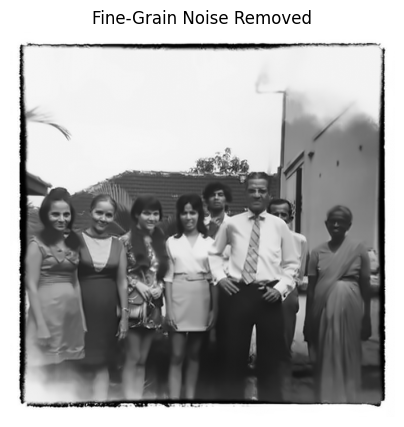

In [44]:

denoised = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7,
                                    searchWindowSize=21)

plt.figure(figsize=(5, 5))
plt.imshow(denoised, cmap='gray')
plt.title('Fine-Grain Noise Removed')
plt.axis('off')
plt.show()


## **Explanation:**
* cv2.fastNlMeansDenoising() is used to remove fine noise without losing important details.
* h=10: Controls the strength of noise removal.
* Effect: The image becomes clearer by reducing grainy noise.

## **Step 4: Sharpen the Faces and Objects while Keeping Natural Textures**
To enhance details, we use Unsharp Masking, which adds sharpness by emphasizing edges.

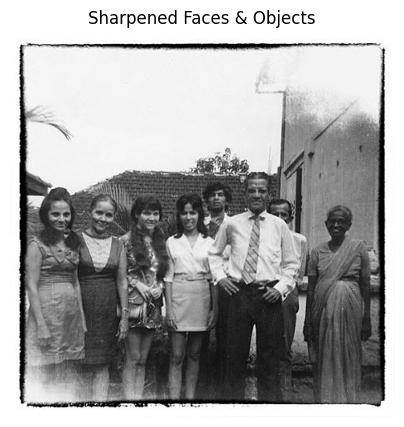

In [45]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Apply Unsharp Masking
sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
# Ensure values remain in the valid range (0-255)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

plt.figure(figsize=(5, 5))
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Faces & Objects')
plt.axis('off')
plt.show()


## **Explanation:**
* Unsharp Masking:
  * The image is blurred using cv2.GaussianBlur().
  * The blurred version is subtracted from the original image and weighted using cv2.addWeighted().
* 1.5 → Enhances original image intensity.
* -0.5 → Subtracts the blurred effect to sharpen details.
* Effect: This step improves the sharpness of faces and objects while keeping textures natural.

## Step 5: Compare All Processed Images
Now, we compare all the processing steps in a single visualization.

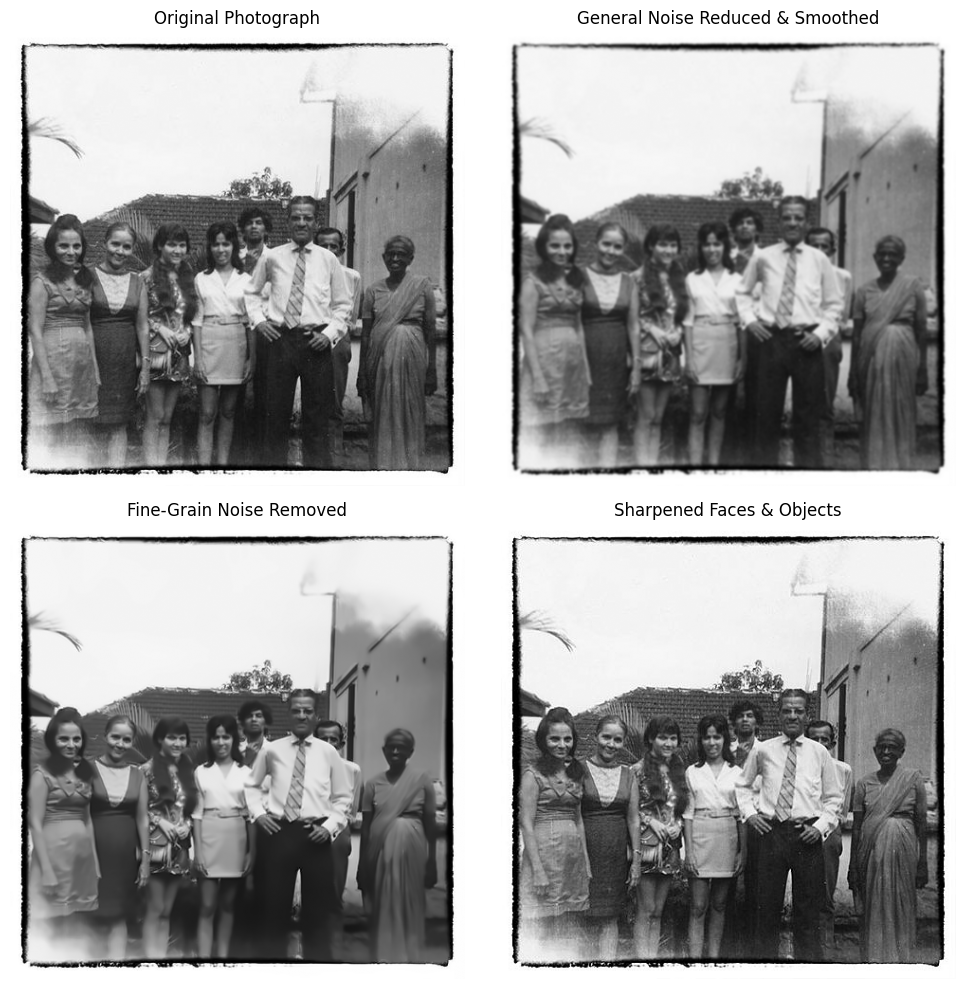

In [46]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Photograph')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed, cmap='gray')
plt.title('General Noise Reduced & Smoothed')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(denoised, cmap='gray')
plt.title('Fine-Grain Noise Removed')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Faces & Objects')
plt.axis('off')

plt.tight_layout()
plt.show()


## **Explanation:**
* We display all four images (original, smoothed, denoised, and sharpened) side by side for comparison.
* Effect: This helps in visually analyzing the improvement at each step.


---



# **Scenario 04: Enhancing Fingerprint Images for Biometric Systems**

## **Step 1: Load the Fingerprint Image**
Displays the original fingerprint image using matplotlib

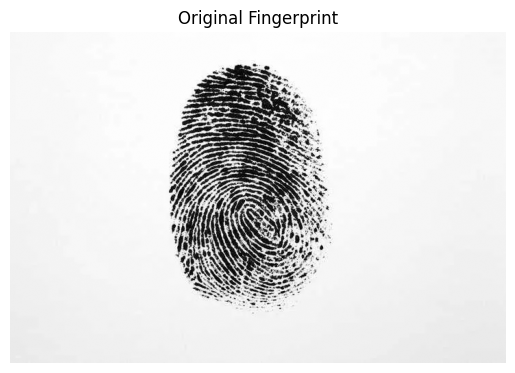

In [48]:
image = cv2.imread('Scanerio 04.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Fingerprint')
plt.axis('off')
plt.show()


## **Step 2: Remove Noise and Small Smudges**

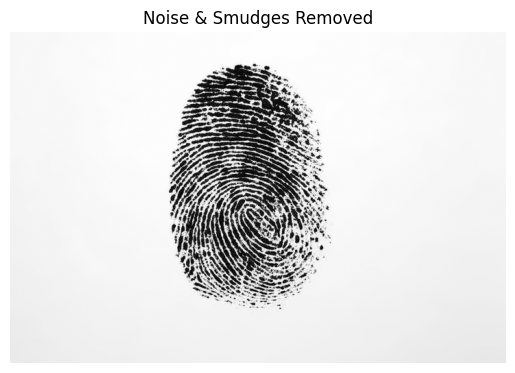

In [55]:
denoised = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)
# Display the denoised image
plt.imshow(denoised, cmap='gray')
plt.title('Noise & Smudges Removed')
plt.axis('off')
plt.show()


## **Explanation:**
* Applies Non-Local Means Denoising to remove noise while preserving fingerprint ridges.
* Uses:
  * h=10: Strength of filtering.
  * templateWindowSize=7: Size of the window for computing denoising.
  * searchWindowSize=21: Area where similar patches are searched.
* Displays the denoised fingerprint image.

## **Step 3: Smooth Out Variations and Improve Contrast**

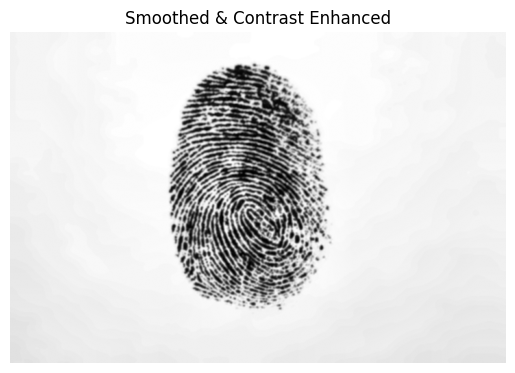

In [50]:
# Apply Gaussian Blur for minor smoothing
smoothed = cv2.GaussianBlur(denoised, (5, 5), 0)
# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced = clahe.apply(smoothed)

plt.imshow(contrast_enhanced, cmap='gray')
plt.title('Smoothed & Contrast Enhanced')
plt.axis('off')
plt.show()


## **Explanation:**
* Applies Gaussian Blur to reduce unwanted variations in intensity.
* Uses CLAHE (Contrast Limited Adaptive Histogram Equalization):
  * clipLimit=2.0: Prevents over-amplification of noise.
  * tileGridSize=(8,8): Divides the image into small regions and enhances contrast within each.

## **Step 4: Enhance Ridge Patterns**

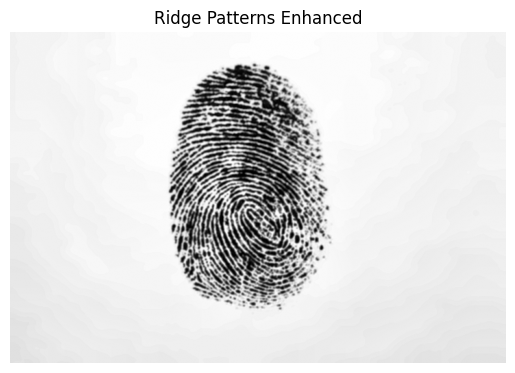

In [51]:
# Apply Unsharp Masking to sharpen fingerprint ridges
blurred = cv2.GaussianBlur(contrast_enhanced, (5, 5), 0)
sharpened = cv2.addWeighted(contrast_enhanced, 1.5, blurred, -0.5, 0)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

plt.imshow(sharpened, cmap='gray')
plt.title('Ridge Patterns Enhanced')
plt.axis('off')
plt.show()


## **Explanation:**
* Applies Unsharp Masking:
  * Sharpens edges by subtracting a blurred version of the image from the original.
  * cv2.addWeighted(contrast_enhanced, 1.5, blurred, -0.5, 0):
    * 1.5 * original image
    * -0.5 * blurred image
* Ensures pixel values are in range (0-255) to avoid artifacts.

## **Step 5: Apply Binary Thresholding (Optional)**

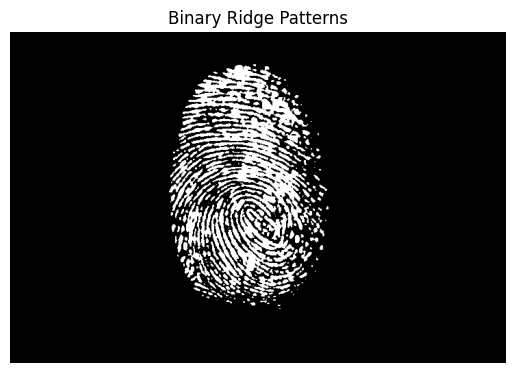

In [52]:
# Convert the sharpened image into binary format (black & white) to isolate ridges
_, ridges = cv2.threshold(sharpened, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(ridges, cmap='gray')
plt.title('Binary Ridge Patterns')
plt.axis('off')
plt.show()


## **Explanation:**
* Applies Binary Thresholding:
 * Converts grayscale pixels into black or white.
 * cv2.THRESH_BINARY_INV: Inverts the colors (ridges become white, background black).


## **Step 6: Compare All Images**

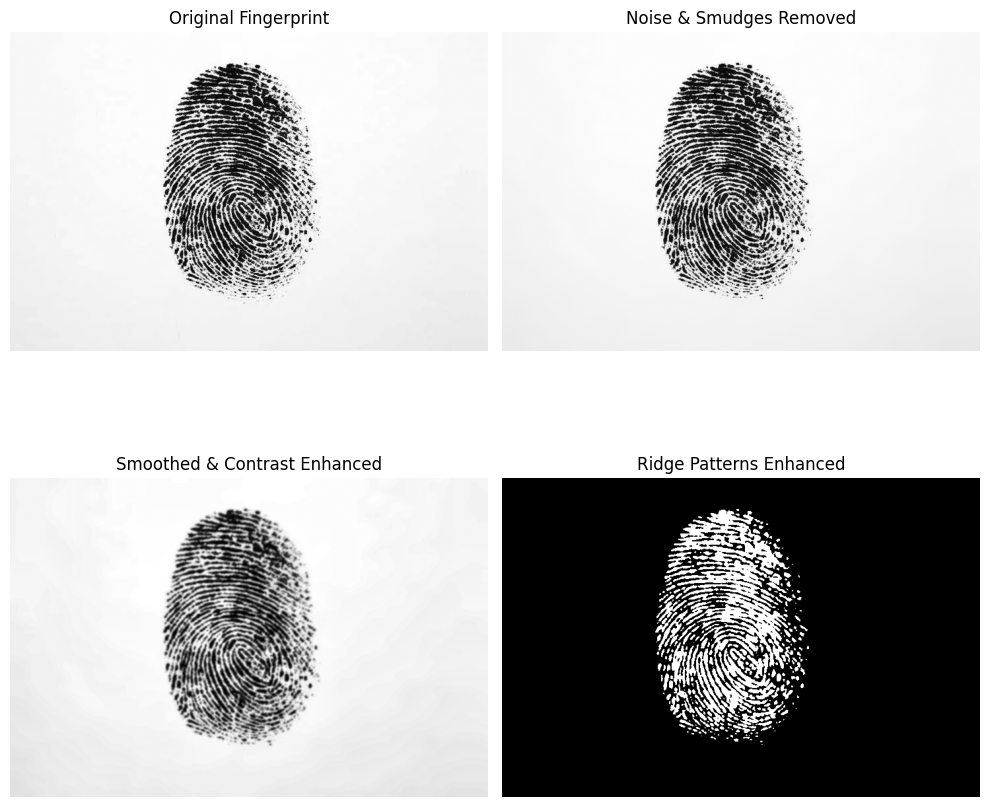

In [54]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Fingerprint')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(denoised, cmap='gray')
plt.title('Noise & Smudges Removed')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(contrast_enhanced, cmap='gray')
plt.title('Smoothed & Contrast Enhanced')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(ridges, cmap='gray')
plt.title('Ridge Patterns Enhanced')
plt.axis('off')

plt.tight_layout()
plt.show()


## **Explanation**
* Displays each image step-by-step:
 * Original fingerprint for reference.
 * Denoised image (noise and smudges removed).
 * Contrast-enhanced image (improved visibility of ridges).
 * Binary ridge image (black & white fingerprint structure).


---

